In [ ]:
%autosave 5

Autosaving every 5 seconds


In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Data Preprocessing

In [5]:
'''Take files from Data_pickle'''
import pickle
import os 
os.chdir('/content/drive/My Drive/AdvancedNLPProject/Sravani/Data_pickle')
with open('Sports_Sentences.pickle', 'rb') as f:
    Sports_Sentences = pickle.load(f)
with open('Health_Sentences.pickle', 'rb') as f:
    Health_Sentences = pickle.load(f)  
with open('Politics_Sentences.pickle', 'rb') as f:
    Politics_Sentences = pickle.load(f) 
with open('Food_Sentences.pickle', 'rb') as f:
    Food_Sentences = pickle.load(f)

In [6]:
''' While creating MultiTopic Documents { 0: Health , 1 : Sports , 2 : Politics , 3 : Food } '''
Sentences = []
Topic_number =[]
for sentence in Health_Sentences:
  Sentences.append(sentence)
  Topic_number.append(0)

for sentence in Sports_Sentences:
  Sentences.append(sentence)
  Topic_number.append(1)

for sentence in Politics_Sentences:
  Sentences.append(sentence)
  Topic_number.append(2)

for sentence in Food_Sentences:
  Sentences.append(sentence)
  Topic_number.append(3)

print(len(Sentences),len(Topic_number))

130088 130088


In [11]:
import pandas as pd
Data = pd.DataFrame(list(zip(Sentences,Topic_number)), 
               columns =['Sentence', 'label']) 
Data = Data.sample(frac = 1)
Data.head(5)

,Sentence,label
92374,"Moreover, it is precisely because some individ...",2
16306,"nonetheless, all animals involved in the disea...",0
95449,The numbers showed what everyone familiar with...,2
82160,This could make you wonder why there's a panic...,2
109150,"The Hot & Spicy is my favorite, but all are pr...",3


In [12]:
import re

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return x

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '', x)
        x = re.sub('[0-9]{4}', '', x)
        x = re.sub('[0-9]{3}', '', x)
        x = re.sub('[0-9]{2}', '', x)
    return x

In [13]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

In [14]:
# lower the text
Data["Sentence"] = Data["Sentence"].apply(lambda x: x.lower())

# Clean the text
Data["Sentence"] = Data["Sentence"].apply(lambda x: clean_text(x))

# Clean numbers
Data["Sentence"] = Data["Sentence"].apply(lambda x: clean_numbers(x))

# Clean Contractions
Data["Sentence"] = Data["Sentence"].apply(lambda x: replace_contractions(x))

In [15]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(Data['Sentence'], Data['label'],
                                                    stratify=Data['label'], 
                                                    test_size=0.25)

In [17]:
print("Train shape : ",train_X.shape)
print("Test shape : ",test_X.shape)

Train shape :  (97566,)
Test shape :  (32522,)


In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_features = 120000 # how many unique words to use (i.e num rows in embedding vector) . This is also the vocabulary size 
maxlen = 750 # max number of words in a question to use

## Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_X))
train_X = tokenizer.texts_to_sequences(train_X)
test_X = tokenizer.texts_to_sequences(test_X)

## Pad the sentences 
train_X = pad_sequences(train_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)


In [ ]:
'''Unzipping Files '''
# import os 
# os.chdir('/content/drive/My Drive/AdvancedNLPProject/Sravani/Data')
# !unzip -u "/content/drive/My Drive/AdvancedNLPProject/Sravani/Data/glove.840B.300d.zip" -d "/content/drive/My Drive/AdvancedNLPProject/Sravani/Data"

Archive:  /content/drive/My Drive/AdvancedNLPProject/Sravani/Data/glove.840B.300d.zip


In [20]:
import numpy as np 
def load_glove(word_index):
    EMBEDDING_FILE = '/content/drive/My Drive/AdvancedNLPProject/Sravani/Data/glove.840B.300d.txt'
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')[:300]
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
    
    all_embs = np.stack(embeddings_index.values())
    emb_mean,emb_std = -0.005838499,0.48782197
    embed_size = all_embs.shape[1]

    nb_words = min(max_features, len(word_index)+1)
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in word_index.items():
        if i >= max_features: continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
        else:
            embedding_vector = embeddings_index.get(word.capitalize())
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

embedding = 1
if embedding :
  embedding_matrix = load_glove(tokenizer.word_index)
else :
  embedding_matrix = np.random.randn(120000,300)
np.shape(embedding_matrix)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


(61455, 300)

# Convolution Network based PyTorch Implementation

In [23]:
class CNN_Text(nn.Module):
    
    def __init__(self):
        super(CNN_Text, self).__init__()
        filter_sizes = [1,2,3,5]
        num_filters = 36
        n_classes = 4
        self.embedding = nn.Embedding(max_features, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.convs1 = nn.ModuleList([nn.Conv2d(1, num_filters, (K, embed_size)) for K in filter_sizes])
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(len(filter_sizes)*num_filters, n_classes)


    def forward(self, x):
        x = self.embedding(x)  
        x = x.unsqueeze(1)  
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1] 
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  
        x = torch.cat(x, 1)
        x = self.dropout(x)  
        logit = self.fc1(x) 
        return logit

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from torch.optim.optimizer import Optimizer

from sklearn.preprocessing import StandardScaler
from multiprocessing import  Pool
from functools import partial
import numpy as np
from sklearn.decomposition import PCA
import torch as t
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

import random
import copy
import time
import pandas as pd
import numpy as np
import gc
import re
import torch


n_epochs = 10
number_of_classes = 4
embed_size = 300 # how big is each word vector
batch_size = 512 # how many samples to process at once
n_splits = 5 # Number of K-fold Splits
SEED = 10

model = CNN_Text()
loss_fn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model.cuda()

# Load train and test in CUDA Memory
x_train = torch.tensor(train_X, dtype=torch.long).cuda()
y_train = torch.tensor(train_y.to_numpy()).cuda()
x_cv = torch.tensor(test_X, dtype=torch.long).cuda()
y_cv = torch.tensor(test_y.to_numpy()).cuda()

# Create Torch datasets
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

# Create Data Loaders
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

train_loss = []
valid_loss = []

for epoch in range(n_epochs):
    start_time = time.time()
    # Set model to train configuration
    model.train()
    avg_loss = 0.  
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Predict/Forward Pass
        y_pred = model(x_batch)
        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.item() / len(train_loader)
    
    # Set model to validation configuration -Doesn't get trained here
    model.eval()        
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv),number_of_classes))
    
    for i, (x_batch, y_batch) in enumerate(valid_loader):
        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(valid_loader)
        # keep/store predictions
        val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()
    
    # Check Accuracy
    val_accuracy = sum(val_preds.argmax(axis=1)==test_y)/len(test_y)
    pre_y = val_preds.argmax(axis=1)
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss)
    elapsed_time = time.time() - start_time 
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f} \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1/10 	 loss=161.0484 	 val_loss=96.2094  	 val_acc=0.9265 	 time=61.70s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 2/10 	 loss=89.4875 	 val_loss=87.1250  	 val_acc=0.9320 	 time=60.70s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 3/10 	 loss=77.9383 	 val_loss=81.1909  	 val_acc=0.9352 	 time=61.27s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 4/10 	 loss=69.5599 	 val_loss=83.0266  	 val_acc=0.9340 	 time=61.74s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 5/10 	 loss=62.2535 	 val_loss=79.6592  	 val_acc=0.9360 	 time=61.32s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 6/10 	 loss=56.0055 	 val_loss=78.0706  	 val_acc=0.9381 	 time=61.12s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 7/10 	 loss=51.2451 	 val_loss=79.7990  	 val_acc=0.9371 	 time=61.11s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 8/10 	 loss=46.7413 	 val_loss=79.1995  	 val_acc=0.9375 	 time=61.18s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 9/10 	 loss=42.6988 	 val_loss=79.9121  	 val_acc=0.9384 	 time=61.56s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 10/10 	 loss=38.7987 	 val_loss=81.4120  	 val_acc=0.9389 	 time=61.67s


In [26]:
torch.save(model,'textcnn_model')

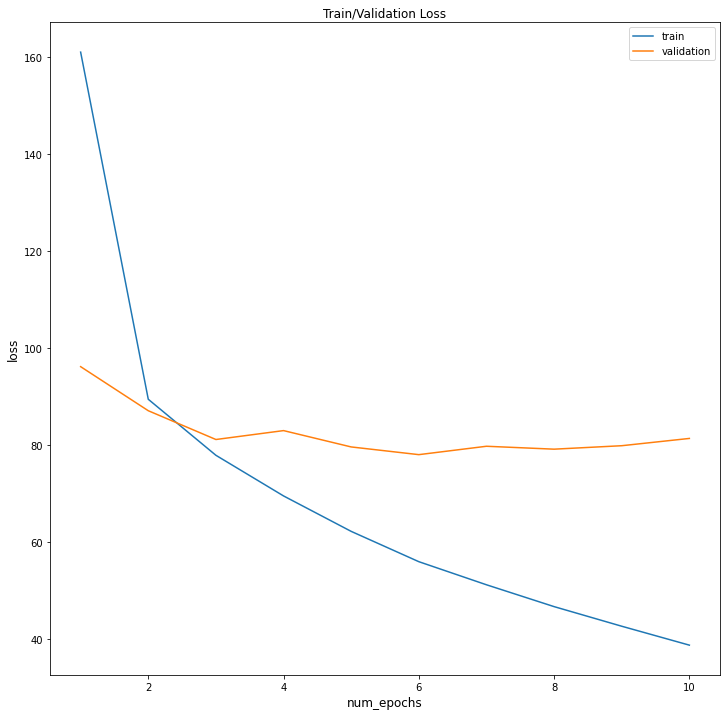

In [27]:
def plot_graph(epochs):
    fig = plt.figure(figsize=(12,12))
    plt.title("Train/Validation Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train')
    plt.plot(list(np.arange(epochs) + 1), valid_loss, label='validation')
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.legend(loc='best')
plot_graph(n_epochs)

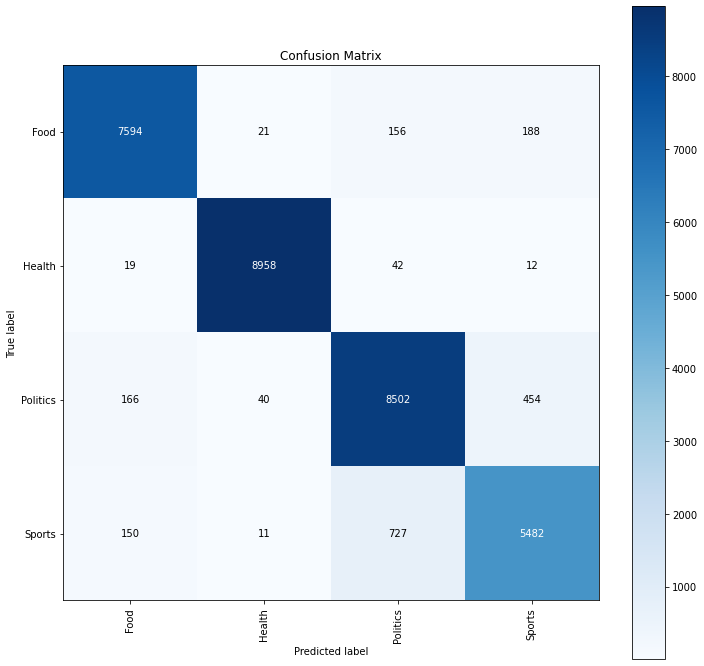

In [29]:
!pip install scikit-plot
import scikitplot as skplt
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
classes = ['Health','Sports','Politics','Food']
y_true = [classes[x] for x in test_y]
y_pred = [classes[x] for x in val_preds.argmax(axis=1)]
skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(12,12),x_tick_rotation=90)

# LSTM based Pytorch Implementation

In [31]:
class BiLSTM(nn.Module):
    
    def __init__(self):
        super(BiLSTM, self).__init__()
        self.hidden_size = 64
        drp = 0.1
        n_classes = 4
        self.embedding = nn.Embedding(max_features, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embed_size, self.hidden_size, bidirectional=True, batch_first=True , num_layers=4)
        self.linear = nn.Linear(self.hidden_size*4 , 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(drp)
        self.out = nn.Linear(64, n_classes)


    def forward(self, x):
        #rint(x.size())
        h_embedding = self.embedding(x)
        #_embedding = torch.squeeze(torch.unsqueeze(h_embedding, 0))
        h_lstm, _ = self.lstm(h_embedding)
        avg_pool = torch.mean(h_lstm, 1)
        max_pool, _ = torch.max(h_lstm, 1)
        conc = torch.cat(( avg_pool, max_pool), 1)
        conc = self.relu(self.linear(conc))
        conc = self.dropout(conc)
        out = self.out(conc)
        return out

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from torch.optim.optimizer import Optimizer

from sklearn.preprocessing import StandardScaler
from multiprocessing import  Pool
from functools import partial
import numpy as np
from sklearn.decomposition import PCA
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

import random
import copy
import time
import pandas as pd
import numpy as np
import gc
import re
import torch


n_epochs = 10
number_of_classes = 4
embed_size = 300 # how big is each word vector
batch_size = 512 # how many samples to process at once
n_splits = 5 # Number of K-fold Splits
SEED = 10

model = BiLSTM()
loss_fn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model.cuda()

# Load train and test in CUDA Memory
x_train = torch.tensor(train_X, dtype=torch.long).cuda()
y_train = torch.tensor(train_y.to_numpy()).cuda()
x_cv = torch.tensor(test_X, dtype=torch.long).cuda()
y_cv = torch.tensor(test_y.to_numpy()).cuda()

# Create Torch datasets
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

# Create Data Loaders
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

train_loss = []
valid_loss = []

for epoch in range(n_epochs):
    start_time = time.time()
    # Set model to train configuration
    model.train()
    avg_loss = 0.  
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Predict/Forward Pass
        y_pred = model(x_batch)
        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.item() / len(train_loader)
    
    # Set model to validation configuration -Doesn't get trained here
    model.eval()        
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv),number_of_classes))
    
    for i, (x_batch, y_batch) in enumerate(valid_loader):
        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(valid_loader)
        # keep/store predictions
        val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()
    
    # Check Accuracy
    val_accuracy = sum(val_preds.argmax(axis=1)==test_y)/len(test_y)
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss) 
    elapsed_time = time.time() - start_time
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f} \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy,elapsed_time))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1/10 	 loss=295.4759 	 val_loss=117.2055  	 val_acc=0.9110 	 time=132.22s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 2/10 	 loss=109.2788 	 val_loss=98.6028  	 val_acc=0.9213 	 time=131.40s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 3/10 	 loss=91.9720 	 val_loss=87.7962  	 val_acc=0.9306 	 time=131.32s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 4/10 	 loss=84.6464 	 val_loss=88.4146  	 val_acc=0.9292 	 time=131.50s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 5/10 	 loss=78.6970 	 val_loss=83.4143  	 val_acc=0.9301 	 time=131.50s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 6/10 	 loss=72.5688 	 val_loss=79.8498  	 val_acc=0.9375 	 time=131.70s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 7/10 	 loss=67.8131 	 val_loss=80.9716  	 val_acc=0.9328 	 time=131.53s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 8/10 	 loss=62.6146 	 val_loss=83.6592  	 val_acc=0.9359 	 time=131.45s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 9/10 	 loss=58.6667 	 val_loss=80.1365  	 val_acc=0.9378 	 time=131.55s


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 10/10 	 loss=55.2280 	 val_loss=82.3938  	 val_acc=0.9339 	 time=131.65s


In [35]:
torch.save(model,'bilstm_model')

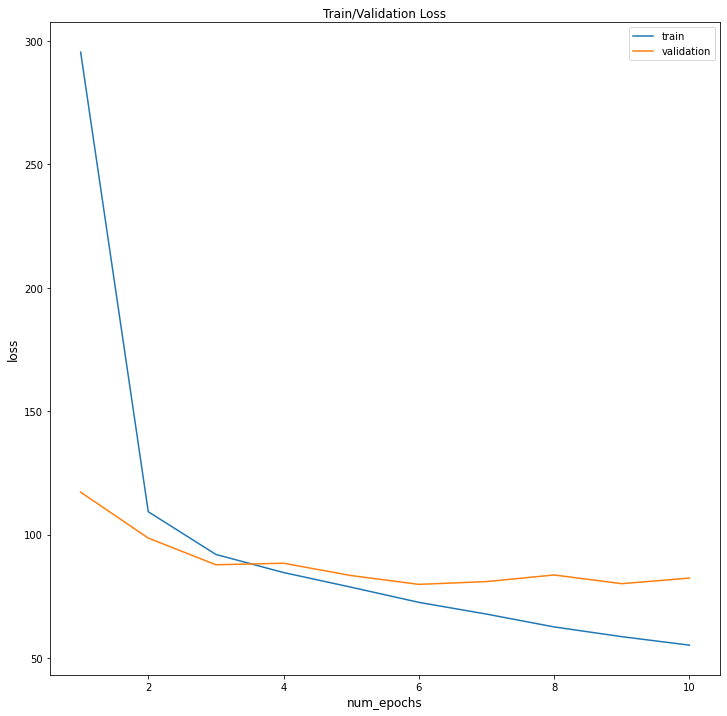

In [36]:
def plot_graph(epochs):
    fig = plt.figure(figsize=(12,12))
    plt.title("Train/Validation Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train')
    plt.plot(list(np.arange(epochs) + 1), valid_loss, label='validation')
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.legend(loc='best')
plot_graph(n_epochs)

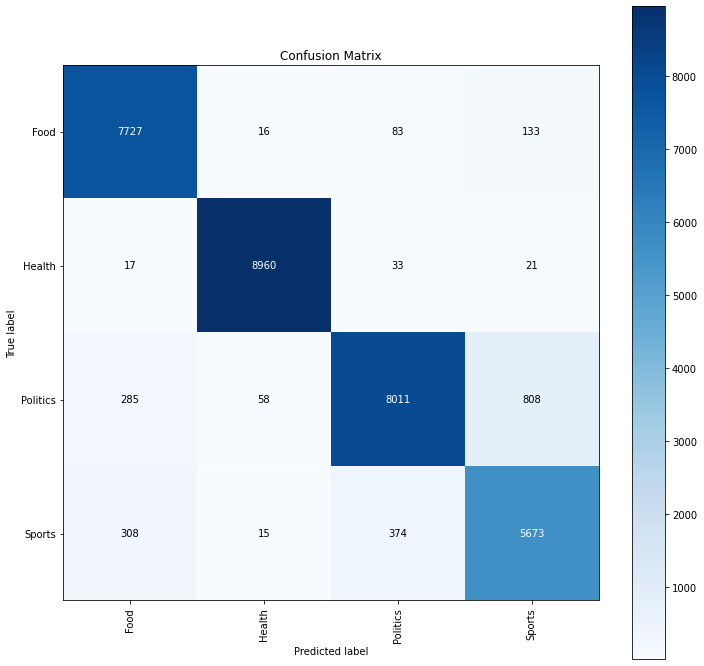

In [37]:
import scikitplot as skplt
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
classes = ['Health','Sports','Politics','Food']
y_true = [classes[x] for x in test_y]
y_pred = [classes[x] for x in val_preds.argmax(axis=1)]
skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(12,12),x_tick_rotation=90)

# Evaluation

In [3]:
''' While creating MultiTopic Documents { 0: Health , 1 : Sports , 2 : Politics , 3 : Food } '''
import pandas as pd 
MultiTopicDocs = pd.read_csv("/content/drive/My Drive/AdvancedNLPProject/Sravani/data-4topics500.csv")
MultiTopicDocs.head()

,Unnamed: 0,Doc,Num_of_topics,Topics,Topic_order
0,0,Black students were hurt most when Wellesley t...,3,"['PoliticsPolicy', 'Health', 'Food']","[2, 2, 0, 2, 3, 0, 3, 2, 2, 2, 0, 2, 0, 0, 0, ..."
1,1,BACKGROUND.\nant colony algorithm belongs to ...,3,"['Food', 'Health', 'Sports']","[0, 0, 3, 1, 3, 3, 3, 3, 1, 1, 0, 1, 3, 3, 3, ..."
2,2,BACKGROUND.\n9 myths about sexual assault.\nlo...,4,"['PoliticsPolicy', 'Health', 'Food', 'Sports']","[0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 3, 0, 3, 3, ..."
3,3,Jockey Ramon Dominguez has made enough progres...,2,"['Sports', 'Food']","[1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, ..."
4,4,Love it!I really like the flavor of this one!\...,2,"['Food', 'PoliticsPolicy']","[3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, ..."


In [4]:
def predict_single(x):    
    # lower the text
    x = x.lower()
    # Clean the text
    x =  clean_text(x)
    # Clean numbers
    x =  clean_numbers(x)
    # Clean Contractions
    x = replace_contractions(x)
    # tokenize
    x = tokenizer.texts_to_sequences([x])
    # pad
    x = pad_sequences(x, maxlen=maxlen)
    # create dataset
    x = torch.tensor(x, dtype=torch.long).cuda()

    pred = model(x).detach()
    pred = F.softmax(pred).cpu().numpy()

    pred = pred.argmax(axis=1)
    return pred[0]

In [6]:
'''CNN Evaluation'''
from sklearn.metrics import f1_score
import re
import torch


model = torch.load('/content/drive/My Drive/AdvancedNLPProject/Sravani/textcnn_model')
ind_accuracy=[]
ind_fscore=[]
for index, row in MultiTopicDocs.iterrows():
    Document= row['Doc'].split("\n")
    Topics_order_string = row['Topic_order']
    Topics_order_string = Topics_order_string.replace("[", "")
    Topics_order_string = Topics_order_string.replace("]", "")
    actual_topic_order = Topics_order_string.split(",")
    # print(len(Document),len(actual_topic_order))
    predicted_topic_order = []
    for sentence in Document : 
      predicted_topic_order.append(predict_single(sentence))
      
    # print(predicted_topic_order,actual_topic_order)
    '''Document-Accuracy'''
    actual_topic_order_num = [int(i) for i in actual_topic_order] 
    match = 0
    for i in range(0,len(actual_topic_order_num)):
      if actual_topic_order_num[i]==predicted_topic_order[i]:
        match = match+1
    ind_accuracy.append(match/len(actual_topic_order_num))

    '''Document F1score'''
    f1score = f1_score(actual_topic_order_num, predicted_topic_order , average='macro')
    ind_fscore.append(f1score)

print("No of Documents :" ,len(ind_accuracy))
print("Accuracy : ",sum(ind_accuracy)/len(ind_accuracy))
print("F1Score : " ,sum(ind_fscore)/len(ind_fscore))

AttributeError: ignored

In [59]:
'''BiLSTM Evaluation'''
from sklearn.metrics import f1_score
import re

model = torch.load('/content/drive/My Drive/AdvancedNLPProject/Sravani/bilstm_model')
ind_accuracy=[]
ind_fscore=[]
for index, row in MultiTopicDocs.iterrows():
    Document= row['Doc'].split("\n")
    Topics_order_string = row['Topic_order']
    Topics_order_string = Topics_order_string.replace("[", "")
    Topics_order_string = Topics_order_string.replace("]", "")
    actual_topic_order = Topics_order_string.split(",")
    # print(len(Document),len(actual_topic_order))
    predicted_topic_order = []
    for sentence in Document : 
      predicted_topic_order.append(predict_single(sentence))
      
    '''Document-Accuracy'''
    actual_topic_order_num = [int(i) for i in actual_topic_order] 
    match = 0
    for i in range(0,len(actual_topic_order_num)):
      if actual_topic_order_num[i]==predicted_topic_order[i]:
        match = match+1
    ind_accuracy.append(match/len(actual_topic_order_num))

    '''Document F1score'''
    f1score = f1_score(actual_topic_order_num, predicted_topic_order,average='macro')
    ind_fscore.append(f1score)
    
print("No of Documents :" ,len(ind_accuracy))
print("Accuracy : ",sum(ind_accuracy)/len(ind_accuracy))
print("F1Score : " ,sum(ind_fscore)/len(ind_fscore))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


No of Documents : 500
Accuracy :  0.8976527536961354
F1Score :  0.8976527536961354
